<a href="https://colab.research.google.com/github/hash-poonam/College_App/blob/main/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim**:- To Predict the gold price using Random Forest Regression.

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [24]:
# loading the csv data to a Pandas DataFrame
gold_data_poonam = pd.read_csv('/content/gld_price_data.csv')

In [25]:
# print first 5 rows in the dataframe
gold_data_poonam.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
# print last 5 rows of the dataframe
gold_data_poonam.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [27]:
# number of rows and columns
gold_data_poonam.shape

(2290, 6)

In [28]:
# getting some basic informations about the data
gold_data_poonam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [29]:
# checking the number of missing values
gold_data_poonam.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [30]:
# getting the statistical measures of the data
gold_data_poonam.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [31]:
correlation = gold_data_poonam.corr()

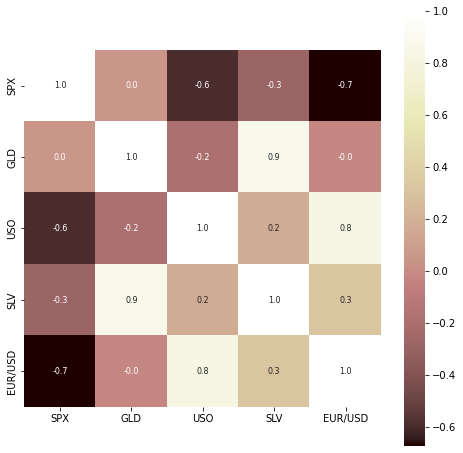

In [55]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='pink')

In [33]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


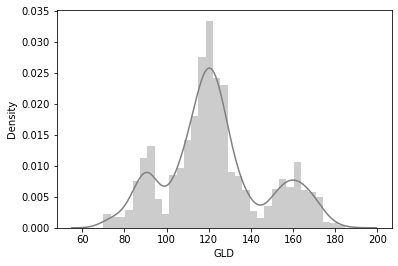

In [59]:
# checking the distribution of the GLD Price
sns.distplot(gold_data_poonam['GLD'],color='gray')

Splitting the Features and Target

In [36]:
X = gold_data_poonam.drop(['Date','GLD'],axis=1)
Y = gold_data_poonam['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [60]:
X_train_poonam, X_test_poonam, Y_train_poonam, Y_test_poonam = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [61]:
regressor = RandomForestRegressor(n_estimators=100)

In [62]:
# training the model
regressor.fit(X_train_poonam,Y_train_poonam)

RandomForestRegressor()

Model Evaluation

In [70]:
# prediction on Test Data
test_data_prediction_poonam = regressor.predict(X_test_poonam)

In [71]:
print(test_data_prediction_poonam)

[168.75649948  82.03889981 116.0085005  127.74670046 120.67350132
 154.88649761 150.66579844 126.13800053 117.55189857 126.07510021
 116.58890121 171.83380109 141.118599   167.92079833 115.1903
 117.63220041 139.62440263 169.98050075 159.88850348 161.68119971
 155.2033001  125.20820014 176.35670009 157.47730304 125.2724003
  93.61479966  77.57339972 120.55719987 119.09839955 167.51900006
  88.05430057 125.35709999  91.22980057 117.6104006  121.09829914
 136.44450127 115.45230129 115.07960079 147.8639998  107.02710091
 104.38580223  87.31769816 126.4708002  118.17079989 152.23039885
 119.56680023 108.32520002 108.22599853  93.21130044 127.16469752
  75.26870033 113.60849905 121.11560014 111.23199909 118.89509895
 120.31339954 159.66969995 166.03660075 147.29129728  85.88059859
  94.28540002  86.90609903  90.55040035 119.13840058 126.45290067
 127.48890028 169.62359994 122.22629956 117.52169859  98.70620037
 168.24940097 142.85699833 131.9917032  121.26140236 121.02419951
 119.72490072 1

In [72]:
# R squared error
error_score = metrics.r2_score(Y_test_poonam, test_data_prediction_poonam)
print("R squared error : ", error_score)

R squared error :  0.989620256246503


Compare the Actual Values and Predicted Values in a Plot

In [74]:
Y_test = list(Y_test_poonam)

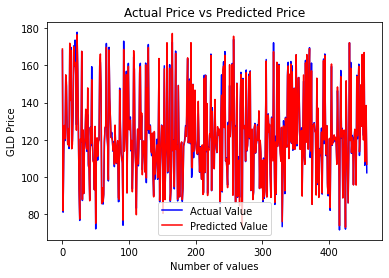

In [75]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction_poonam, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()